In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-case-study-hackathon-c44/data_dictionary.csv
/kaggle/input/telecom-churn-case-study-hackathon-c44/sample.csv
/kaggle/input/telecom-churn-case-study-hackathon-c44/train.csv
/kaggle/input/telecom-churn-case-study-hackathon-c44/test.csv


In [27]:
train_file_path = r'/kaggle/input/telecom-churn-case-study-hackathon-c44/train.csv'
test_file_path = r'/kaggle/input/telecom-churn-case-study-hackathon-c44/test.csv'
tc_train = pd.read_csv(train_file_path)
tc_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [28]:
tc_train.shape

(69999, 172)

In [29]:
tc_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

## Filtering the relevant columns

In [30]:
## Counting the percent of null values
pd.options.display.max_rows = 180
(tc_train.isnull().sum().sort_values(ascending=False)/ len (tc_train))*100

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

In [31]:
## Following list of columns seems to have high number of null values
missing_cols =[
    "arpu_3g_6",
    "count_rech_2g_6",
    "night_pck_user_6",
    "arpu_2g_6",
    "date_of_last_rech_data_6",
    "total_rech_data_6",
    "av_rech_amt_data_6",
    "max_rech_data_6",
    "count_rech_3g_6",
    "fb_user_6",
    "night_pck_user_7",
    "date_of_last_rech_data_7",
    "total_rech_data_7",
    "max_rech_data_7",
    "fb_user_7",
    "count_rech_2g_7",
    "count_rech_3g_7",
    "arpu_3g_7",
    "av_rech_amt_data_7",
    "arpu_2g_7",
    "count_rech_2g_8",
    "av_rech_amt_data_8",
    "night_pck_user_8",
    "max_rech_data_8",
    "total_rech_data_8",
    "arpu_2g_8",
    "arpu_3g_8",
    "date_of_last_rech_data_8",
    "fb_user_8",
    "count_rech_3g_8",
    "count_rech_3g_8",
]

## dropping these columns from the original dataset to make it suitable for EDA
tc_train =tc_train.drop(labels=missing_cols, axis=1).copy()

## removing id columns as well
tc_train =tc_train.drop(labels='id', axis=1).copy()

tc_train.shape

(69999, 141)

In [32]:
## Working on the left over columns with nulls
(tc_train.isnull().sum().sort_values(ascending=False)/ len (tc_train))*100

loc_ic_mou_8            5.290076
og_others_8             5.290076
loc_og_t2f_mou_8        5.290076
loc_ic_t2t_mou_8        5.290076
spl_og_mou_8            5.290076
loc_og_t2m_mou_8        5.290076
loc_ic_t2m_mou_8        5.290076
loc_ic_t2f_mou_8        5.290076
loc_og_t2t_mou_8        5.290076
std_og_t2f_mou_8        5.290076
roam_og_mou_8           5.290076
loc_og_mou_8            5.290076
std_ic_t2t_mou_8        5.290076
roam_ic_mou_8           5.290076
isd_og_mou_8            5.290076
std_ic_t2m_mou_8        5.290076
offnet_mou_8            5.290076
std_ic_t2f_mou_8        5.290076
onnet_mou_8             5.290076
std_og_t2t_mou_8        5.290076
std_ic_t2o_mou_8        5.290076
std_og_mou_8            5.290076
std_ic_mou_8            5.290076
spl_ic_mou_8            5.290076
std_og_t2m_mou_8        5.290076
isd_ic_mou_8            5.290076
std_og_t2c_mou_8        5.290076
ic_others_8             5.290076
loc_og_t2c_mou_8        5.290076
isd_og_mou_6            3.954342
spl_og_mou

In [33]:
# Creating a list of columns having null values
cols_nulls = tc_train.columns[tc_train.isna().any()].tolist()
len(cols_nulls)

95

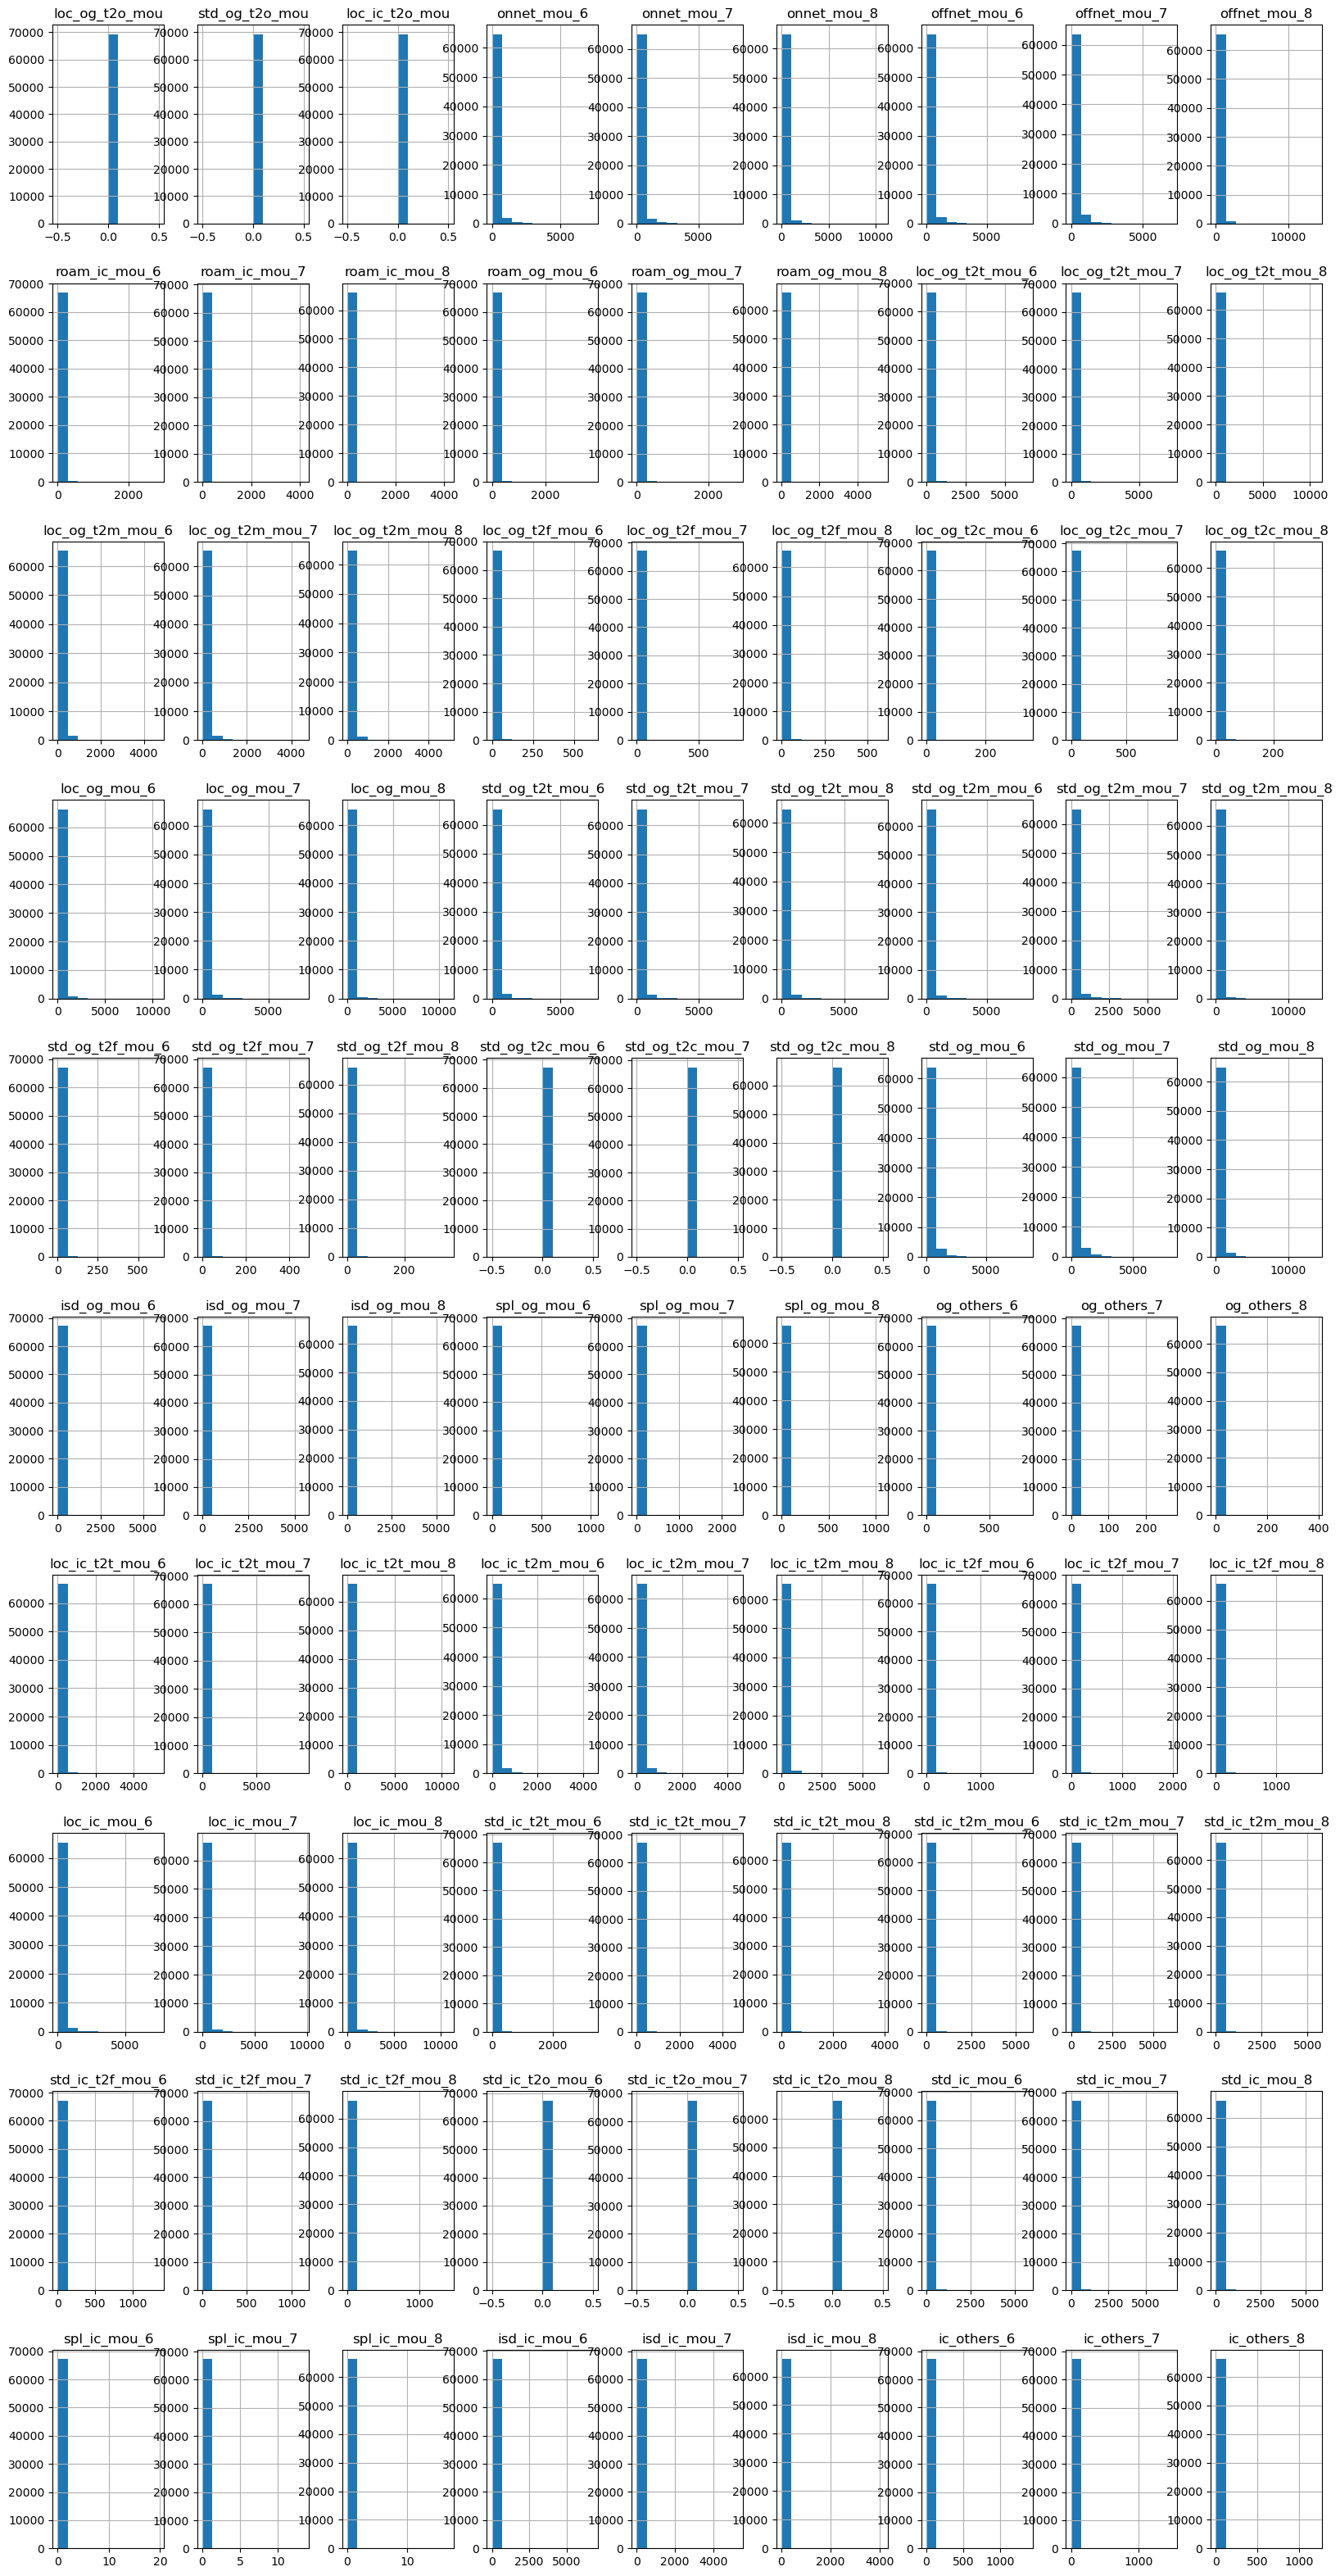

In [9]:
tc_train[cols_nulls].hist(figsize=(20,40));

In [34]:
# most of the above columns are heavly skewed towards 0. Hence replacing nulls by zero
tc_train[cols_nulls] = tc_train[cols_nulls].fillna(0)

tc_train.isnull().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_m

In [38]:
pd.set_option('display.max_columns', None)
tc_train.head(2)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.0,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.0,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.2,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.0,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.0,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.0,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.0,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0


In [42]:
tc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 141 entries, circle_id to churn_probability
dtypes: datetime64[ns](6), float64(108), int64(27)
memory usage: 75.3 MB


## Performing EDA

In [39]:
## Identifying the date columns and converting them to the right format
date_cols = [
    'last_date_of_month_6',
    'last_date_of_month_7',
    'last_date_of_month_8',
    'date_of_last_rech_6',
    'date_of_last_rech_7',
    'date_of_last_rech_8'
]

tc_train[date_cols] = tc_train[date_cols].apply(pd.to_datetime, errors = 'coerce') 

tc_train[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_date_of_month_6  69999 non-null  datetime64[ns]
 1   last_date_of_month_7  69999 non-null  datetime64[ns]
 2   last_date_of_month_8  69999 non-null  datetime64[ns]
 3   date_of_last_rech_6   69999 non-null  datetime64[ns]
 4   date_of_last_rech_7   69999 non-null  datetime64[ns]
 5   date_of_last_rech_8   69999 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 3.2 MB


In [41]:
## Seprating numberical, date and categorical cols
numberic_cols = tc_train.select_dtypes(include=['number'])

cat_cols = tc_train.select_dtypes(include=['object'])

print('Total Numberical columns', len(numberic_cols.columns))
print('Total Caterforical columns', len(cat_cols.columns))

Total Numberical columns 135
Total Caterforical columns 0


The dataset have only numberical and datetime columns and no categroical columns

In [ ]:
sns.heatmap(numberic_cols, annot=True, linewidth=.5, fmt=".1f")

In [11]:
# sns.pairplot(tc_train[cols_nulls])